In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import scipy.misc
from collections import Counter
from sklearn.decomposition import PCA


def KMeans(K,X):
    d,N = X.shape
    change = True
    R = X[:,np.random.randint(0,N,K)]
    M = np.zeros((N, K))
    while change:
        dists = -2 * ( X.T @ R) + np.sum(R ** 2, axis=0, keepdims=True)
        m = np.argmin(dists, axis =1)
        M2 = np.take(np.eye(K), m, axis=0).astype(int)
        change = not np.array_equal(M,M2)
        M = M2
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1)
    return R, m
    

[[6.81956522 5.00377358 5.83529412]
 [1.97608696 0.28679245 1.44509804]]


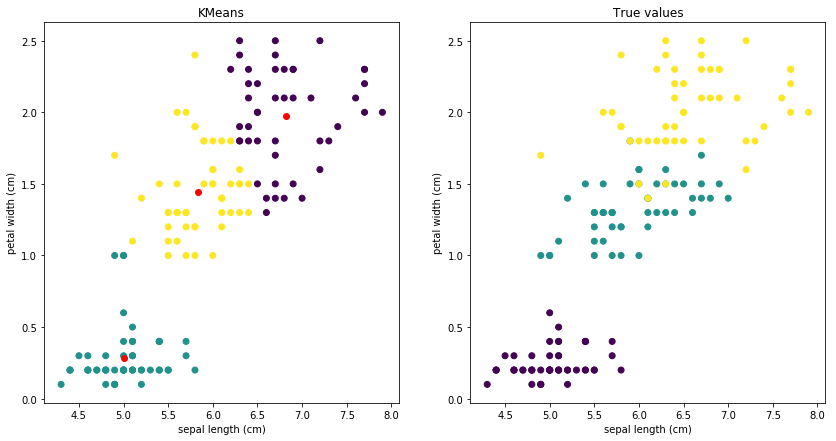

In [2]:
iris = datasets.load_iris()
irisData = np.array(iris.data).T
R, m = KMeans(3, irisData[[0,3],:])
print(R)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.scatter(irisData[0,:], irisData[3,:],c=m)
plt.scatter(R[0,:],R[1,:], c = 'red')

plt.title("KMeans")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
# plt.show()
plt.subplot(122)

plt.scatter(irisData[0,:],irisData[3,:],c=iris.target)
plt.title("True values")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
plt.show()